<a href="https://colab.research.google.com/github/Voyageran/StartNN/blob/main/AMA620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assignment 1
---
JIANG Ran 23036623R



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import torchvision

## Basic Method

### Preparing the Dataset

In [3]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enable = False
torch.manual_seed(random_seed)

In [4]:
## Loading data
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('/content/drive/MyDrive/assign1', train = True, download = False,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307, ), (0.3081,) #global mean, standard deviation of MNIST
                                   )
                                ]
                                )
                               ),
    batch_size = batch_size_train, shuffle = True
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('/content/drive/MyDrive/assign1', train = False, download = False,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307, ), (0.3081,) #global mean, standard deviation of MNIST
                                   )
                                ]
                                )
                               ),
    batch_size = batch_size_test, shuffle = True
)

In [5]:
# Use test_loader
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [6]:
example_data.shape

torch.Size([1000, 1, 28, 28])

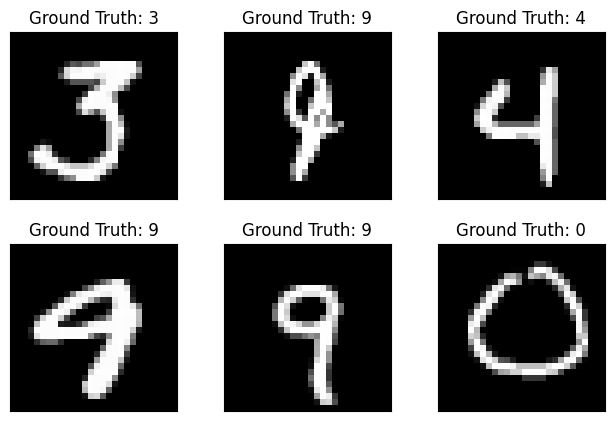

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap = 'gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

# fig

### Building the Network

In [8]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [9]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(1,10,kernel_size=5) # output_channels=10
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320,50)
    self.fc2 = nn.Linear(50,10)

  def forward(self, X):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
    x = x.view(-1, 320) # reshape to a row vector
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training) # matually
    x = self.fc2(x)
    return F.log_softmax(x)

In [10]:
# instance
network = Net()

In [12]:
# initialize optimizer
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum = momentum) #learning_rate=0.01,momentum=0.5

### Training the Model

In [18]:
# keep track of the progress with some printouts
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs+1)]

In [20]:
def train(epoch):
  network.train() # turn on the batch normalization and dropout
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    # nn.CrossEntropyLoss(): log_softmax;
    # F.cross_entropy(input, target) == F.nll_loss(torch.log(input), target)
    loss = F.null_loss(output, target)
    loss.backward()
    optimizer.step() # update params
    if batch_idx % log_interval == 0  #log_interval=10
      print('Train Epoch: {}')


In [22]:
log_interval

10